#Name: Yuvraj Singh Brar
##Roll No: 101903491
##Batch: 4CO19

In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import math
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# importing dataset
dataset = pd.read_excel('DATASET.xlsx')

In [4]:
dataset.head(10)

,Unnamed: 0,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
0,Sec_1,1,324.0,354.5,17.0,0.0,3,117,2600,400,0.0,0.0,0.0,0,1.52
1,NaN,2,324.0,161.1,18.2,0.0,4,106,5950,1190,0.0,3.4,0.0,0,1.62
2,NaN,3,324.0,170.7,18.5,0.0,4,110,5950,1190,0.0,21.3,0.0,4,1.68
3,NaN,4,324.0,223.9,18.9,0.0,3,110,6150,1340,0.0,21.3,0.0,5,1.78
4,NaN,5,324.0,228.2,18.4,0.0,2,113,6340,1450,0.0,23.9,0.0,7,1.80
5,NaN,6,324.0,225.0,17.2,0.0,4,114,6630,1500,0.0,24.9,0.0,7,1.81
6,NaN,7,324.0,130.0,18.4,0.0,3,103,6700,1540,0.9,25.2,0.0,7,1.86
7,NaN,8,324.0,100.6,19.0,0.0,2,114,6740,1590,0.9,52.8,0.0,8,1.89
8,NaN,9,324.0,176.5,19.0,0.0,3,108,7175,1787,3.4,60.5,57.0,8,1.92
9,NaN,10,324.0,53.6,19.0,0.0,2,105,7567,1885,16.8,105.0,65.0,9,1.96


In [5]:
#Proving each section with similar section name
j = 0
for i in range(100):
    dataset.iloc[j:j + 10, 0] = dataset.iloc[j, 0]
    j += 10

In [6]:
# Data preprocessing

dataset.columns = dataset.columns.str.replace('Unnamed: 0', 'Group')
dataset.fillna(0, inplace=True)
test_dataset = dataset.loc[dataset['year'] == 10]
test_dataset

,Group,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
9,Sec_1,10,324.0,53.6,19.0,0.0,2,105,7567,1885,16.8,105.0,65.0,9,1.960
19,Sec_2,10,327.7,62.0,22.7,0.0,2,102,30525,10234,76.5,44.3,5.0,9,0.795
29,Sec_3,10,487.7,93.2,22.5,0.0,4,110,2140,1270,78.5,0.0,0.0,16,1.432
39,Sec_4,10,543.6,93.2,22.5,0.0,4,110,2140,1270,28.5,60.5,67.0,11,2.004
49,Sec_5,10,434.4,149.0,11.7,72.0,3,110,13142,6225,0.0,276.2,34.0,6,1.792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,0,10,514.0,1226.4,10.1,203.6,16,114,7672,303,219.7,206.2,10.0,8,1.607
978,0,10,901.0,1531.0,11.1,34.9,40,100,15150,1077,5.9,74.5,33.0,13,1.087
988,0,10,1181.0,1364.9,9.2,274.3,24,112,12500,880,131.4,72.4,18.0,12,0.996
998,0,10,662.0,1110.7,12.8,33.2,27,117,3324,1356,193.7,305.6,180.0,12,2.212


In [8]:
test_dataset.columns = test_dataset.columns.str.replace('Unnamed: 0', 'Group')
dataset.head(10)

,Group,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
0,Sec_1,1,324.0,354.5,17.0,0.0,3,117,2600,400,0.0,0.0,0.0,0,1.52
1,Sec_1,2,324.0,161.1,18.2,0.0,4,106,5950,1190,0.0,3.4,0.0,0,1.62
2,Sec_1,3,324.0,170.7,18.5,0.0,4,110,5950,1190,0.0,21.3,0.0,4,1.68
3,Sec_1,4,324.0,223.9,18.9,0.0,3,110,6150,1340,0.0,21.3,0.0,5,1.78
4,Sec_1,5,324.0,228.2,18.4,0.0,2,113,6340,1450,0.0,23.9,0.0,7,1.80
5,Sec_1,6,324.0,225.0,17.2,0.0,4,114,6630,1500,0.0,24.9,0.0,7,1.81
6,Sec_1,7,324.0,130.0,18.4,0.0,3,103,6700,1540,0.9,25.2,0.0,7,1.86
7,Sec_1,8,324.0,100.6,19.0,0.0,2,114,6740,1590,0.9,52.8,0.0,8,1.89
8,Sec_1,9,324.0,176.5,19.0,0.0,3,108,7175,1787,3.4,60.5,57.0,8,1.92
9,Sec_1,10,324.0,53.6,19.0,0.0,2,105,7567,1885,16.8,105.0,65.0,9,1.96


In [9]:
# MODEL

etr = ExtraTreesRegressor(n_estimators=200,bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=1000,
                    min_impurity_decrease=0.0, 
                    min_samples_leaf=1,
                    min_weight_fraction_leaf=0.1,
                    n_jobs=None, oob_score=False, random_state=123, verbose=0,
                    warm_start=False)
predict_col_names = ['Para-9', 'Para-10', 'Para-11', 'Para-12', 'Para-13']
result = {'Para-9': [], 'Para-10': [], 'Para-11': [], 'Para-12': [], 'Para-13': []}

# instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [10]:
def selectedModel(val):
    RMSE = []
    N = 0
    index = 0
    #For Applying ExtraTreesRegressor
    if(val==0):
        for j in [10, 11, 12, 13, 14]:
            ans = 0
            count = 0
            for i in range(0, 1000, 10):
                #Extracting Train and Test Data
                xtrain = dataset.iloc[i:i+9, 1:10]
                ytrain = dataset.iloc[i:i+9, j]
                xtest = dataset.iloc[i+9, 1:10].to_numpy()
                ytest = dataset.iloc[i+9, j]

                #Applying Random Forest 
                etr.fit(xtrain, ytrain)

                #Predicting Values
                ypred = etr.predict(xtest.reshape(1,-1))[0]

                #Appending Results
                result[predict_col_names[index]].append(ypred)
                ans += (ytest - ypred)**2
                count += 1
                N += 1

            RMSE.append(ans)
            index += 1
            
    #For Applying Random Forest    
    else:
        for j in [10, 11, 12, 13, 14]:
            ans = 0
            count = 0
            for i in range(0, 1000, 10):
                #Extracting Train and Test Data
                xtrain = dataset.iloc[i:i+9, 1:10]
                ytrain = dataset.iloc[i:i+9, j]
                xtest = dataset.iloc[i+9, 1:10].to_numpy()
                ytest = dataset.iloc[i+9, j]

                #Applying Random Forest 
                rf.fit(xtrain, ytrain)

                #Predicting Values
                ypred = rf.predict(xtest.reshape(1,-1))[0]

                #Appending Results
                result[predict_col_names[index]].append(ypred)
                ans += (ytest - ypred)**2
                count += 1
                N += 1

            RMSE.append(ans)
            index += 1
    return (RMSE, count)

In [ ]:
#Applying Random Forest
result_RMSE, result_count = selectedModel(1)
dataset_predicted = pd.DataFrame.from_dict(result)
dataset_predicted

In [16]:
dataset_predicted

,Para-9,Para-10,Para-11,Para-12,Para-13
0,2.5015,53.0868,37.335,7.579,1.892430
1,56.0135,27.8117,0.885,7.610,0.788332
2,64.2127,0.0000,0.000,11.257,1.361942
3,15.9736,53.1660,57.167,6.998,1.797542
4,0.0000,247.1847,33.835,5.890,1.678023
...,...,...,...,...,...
95,0.0000,92.6511,13.733,3.803,1.320518
96,112.6415,162.1905,5.971,6.491,1.424451
97,0.0732,28.8398,12.433,10.350,1.035424
98,42.4791,32.8911,8.240,9.112,0.771036


### RMSE calculations:- 


In [12]:
# for each column
for i in result_RMSE:
    print((i/result_count)**0.5)

69.46258639071974
70.0759035409492
28.063391114998907
15.053109911576412
0.30160469735033363


In [13]:
result_RMSE

[482505.09080882027,
 491063.2257080416,
 78755.39208733996,
 22659.611801000003,
 9.096539346378634]

In [17]:
print((sum(result_RMSE)/500)**0.5)

46.367928936810365


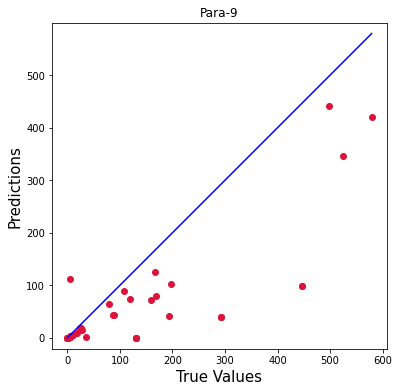

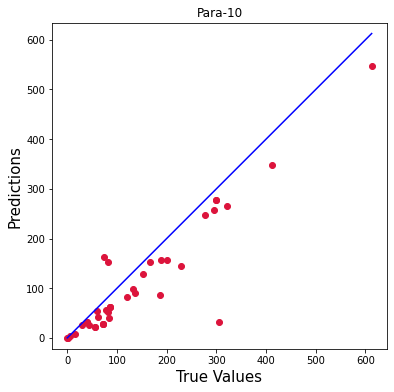

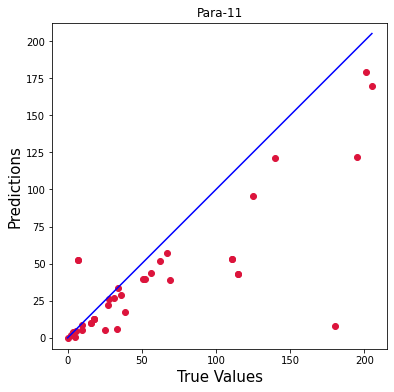

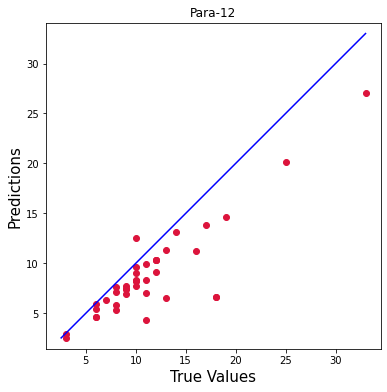

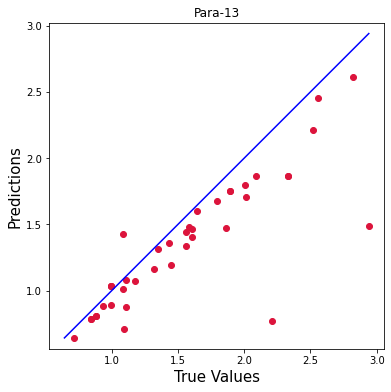

In [15]:
# PLOTS

#Selecting random 40 rows
import random
ind = []
for i in range(40):
    ind.append(random.randint(0,100))
#Scatter plot for random 40 rows out of 100 for each target column
for i in range(5):
    plt.figure(figsize=(6,6))
    true_value = test_dataset.iloc[ind, i+10]
    predicted_value = dataset_predicted.iloc[ind, i]
    plt.scatter(true_value, predicted_value, c='crimson')
    # plt.yscale('log')
    # plt.xscale('log')

    p1 = max(max(predicted_value), max(true_value))
    p2 = min(min(predicted_value), min(true_value))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.title(predict_col_names[i])
    plt.xlabel('True Values', fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.axis('equal')
    plt.show()